In [99]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [51]:
### author: Josimar Edinson Chire Saire
### NUSP: 10569111
### Curso: SCC5830
### 2019/I
### K-Means

import imageio as igio
import matplotlib.pyplot as plt
import numpy as np
import random

In [100]:
# a) Filename for the input image I;
# b) Filename for the reference image R;
# c) Option for pixel attributes:
# 1 - R,G,B
# 2 - R,G,B,x,y
# 3 - luminance
# 4 - luminance,x,y
# d) Number of clusters k:
# e) Number of iterations: n
# f) Seed S to be used for the random centroids choice.
# 2. Generate an output image ( ˆI) according to the option for feature extraction.

def dist(c, x):
    acum = 0
    for i in range(0,len(c)):
        acum += (c[i] - x[i]) * (c[i] - x[i])
    return np.sqrt(acum)

def my_min(x):
    m_min = np.power(2,15)
    idx = -1
    for i in range(0,x.shape[1]):
        if( x[0,i] < m_min ):
            m_min = x[0,i]
            idx = i
    return [m_min, idx]
def function( filename_inp, filename_ref, pixel_att, n_clusters, n_iter, seed ):
    img_inp = igio.imread(filename_inp)
    
    t = 1
    img_shape = img_inp.shape
    m_dist = np.zeros([ img_shape[0], img_shape[1] ])
    
    threshold = 50
    centroids = np.zeros([n_clusters, 3])
    random.seed( seed )
    
    for c in range(0, n_clusters):
        centroids[c][0] = random.randint(0,img_shape[0]-1)
        centroids[c][1] = random.randint(0,img_shape[1]-1)
        centroids[c][2] = img_inp[int(centroids[c][0]), int(centroids[c][1])]
            
#     print(centroids)
    
    while( t < 30 ):
        
        for i in range(0, img_shape[0]):
            for j in range(0, img_shape[1]):
                dist_c = np.zeros([1, n_clusters])
                for c in range(0, n_clusters):
                    dist_c[0, c] = dist( [centroids[c,0], centroids[c,1], centroids[c,2] ], [i, j, img_inp[i,j] ] )
                m_dist[i,j] = my_min(dist_c)[1]
                    
#         print(m_dist)
        
        for c in range(0, n_clusters):
            acum = np.zeros([1,3])
            count = 0
            for i in range(0, img_shape[0]):
                for j in range(0, img_shape[1]):
                    if( m_dist[i,j] == c ):
                        acum[0,0] += i
                        acum[0,1] += j
                        acum[0,2] += img_inp[i,j]
                        count += 1
            
            centroids[c, 0] = acum[0, 0] / count
            centroids[c, 1] = acum[0, 1] / count
            centroids[c, 2] = acum[0, 2] / count
        print(centroids)
        t+=1
    
    plt.figure(figsize = (10,10))
    plt.imshow(m_dist, cmap = plt.get_cmap(name = 'gray'))
    plt.colorbar()
    
    return img_inp.shape

In [101]:
function("flower.jpeg","result.png",1,10,1,1)

(194, 259, 3)


ValueError: setting an array element with a sequence.

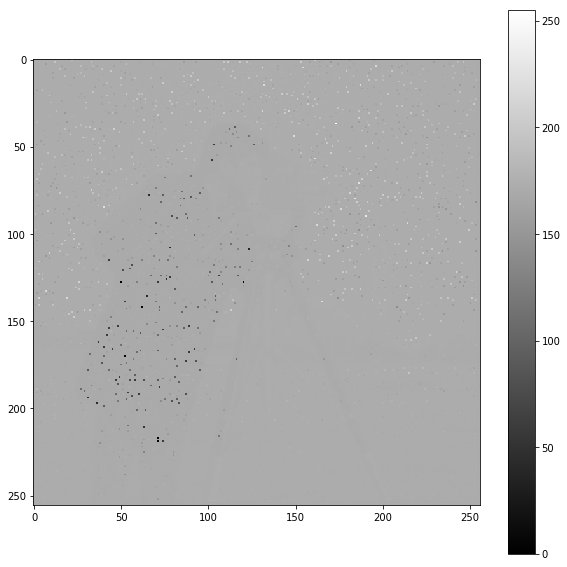

In [91]:
img_inp = igio.imread("result.png")

plt.figure(figsize = (10,10))
plt.imshow(img_inp, cmap = plt.get_cmap(name = 'gray'))
plt.colorbar()

In [71]:
dist_c[0,3]

0.0